# Tasks 2020 
### [ Fundamentals of Data Analysis Module GMIT 2020 ]

<img align="left" width="300" src="https://www.wardyit.com/wp-content/uploads/data-analysis-fundamentals-using-excel.png">

Below are my solutions to the Task assessment.

Completed by: *Olga Rozhdestvina (G00387844@gmit.ie)*
___

## Table of Contents
* [Task 1: Dictionary of unique items with the number of appearance from a list.](#task1)
* [Task 2: Dice roll simulation](#task2)
* [Task 3: Flip a coin simulation ](#task3)
* [Task 4: Simpson’s paradox](#task4)
___

### __TASK 1__: *Dictionary of unique items with the number of appearance from a list.*  <a name="task1"></a>

For completion of this task I will iterate over the list checking on unique items as keys and then count and store the corresponding number of times each item appears as values in the dictionary. [1]

> 1. https://www.geeksforgeeks.org/counting-the-frequencies-in-a-list-using-dictionary-in-python/

In [1]:
def counts(l):
    """
    Function that takes a list as an input and returns a dictionary of unique items with the number of appearance
    """
    # Creating an empty dictionary
    dic = {}
    # Loop through items in the list
    for i in l:
        # Checking if items are in the dictionary
        if i in dic:
            # Count the number of times each item appears
            dic[i] += 1
        else:
            dic[i] = 1
    # Output the dictionary
    return dic

<br>

##### Test of the function <a name="Test_of_the_function1"></a>
Here is a test of the above function with the proposed in the task list ['A', 'A', 'B', 'C', 'A']

In [2]:
counts(['A', 'A', 'B', 'C', 'A'])

{'A': 3, 'B': 1, 'C': 1}

<br>

***
### __TASK 2__: *Dice roll simulation*  <a name="task2"></a>

<img align="left" width="230" src="https://i.pinimg.com/originals/cd/18/f1/cd18f1c40c148545b66e9f6a851c98d2.jpg">

In order to simulate a randomly rolling $k$ dice $n$ number of times I will be using a function from $python.random$ called $randint$ that returns a random integer within a given range (in this cases dice sides) [1]. Alongside with randint I will be using the $sum$ function within the range of given parameter $k$. [2]

To keep track of each total face value I will incorporate a function $counts$ from Task 1.

> 1. [Python: random.randint](https://docs.python.org/3/library/random.html)
2. [Stackoverflow: How to sum up values of a for range function in python](https://stackoverflow.com/questions/43528962/how-to-sum-up-values-of-a-for-range-function-in-python)

#### General setup

In [3]:
# For generating random numbers
import random 
# Package for plotting.
import matplotlib.pyplot as plt
# Another package for plotting.
import seaborn as sns

In [4]:
# Colour scheme and styles for plots.
sns.set_theme(palette="Paired", context="paper", font_scale=1.5)

# Better sized plots.
plt.rcParams['figure.figsize'] = (13, 9)

<br>

#### Dice simulation function 

In [5]:
def dicerolls(k, n):
    """
    Function that simulates randomly rolling k dice n times
    and keeps track of each total face value
    """
    # Initialize the list of rolls
    rolls = []
    # Loop through the number of times the dice is rolled
    for i in range(n):
        # Choose randomly a number between 1 and 6, inclusively, within k range:
        dice = sum(random.randint(1, 6) for j in range(k))
        # Add to list of rolls
        rolls.append(dice)
    # Sort the list in ascending order. 
    rolls = sorted(rolls)
    # Call a function counts from task 1
    output = counts(rolls)
    return output

<br>

#### Test of the function <a name="Test_of_the_function2"></a>
Here is a test of the above function where k number of dices is rolled n number of times

In [6]:
dicerolls(2,1000)

{2: 36,
 3: 58,
 4: 94,
 5: 92,
 6: 132,
 7: 147,
 8: 152,
 9: 109,
 10: 96,
 11: 55,
 12: 29}

<br>

#### Plot the output by rolling a diffent number of dice. 

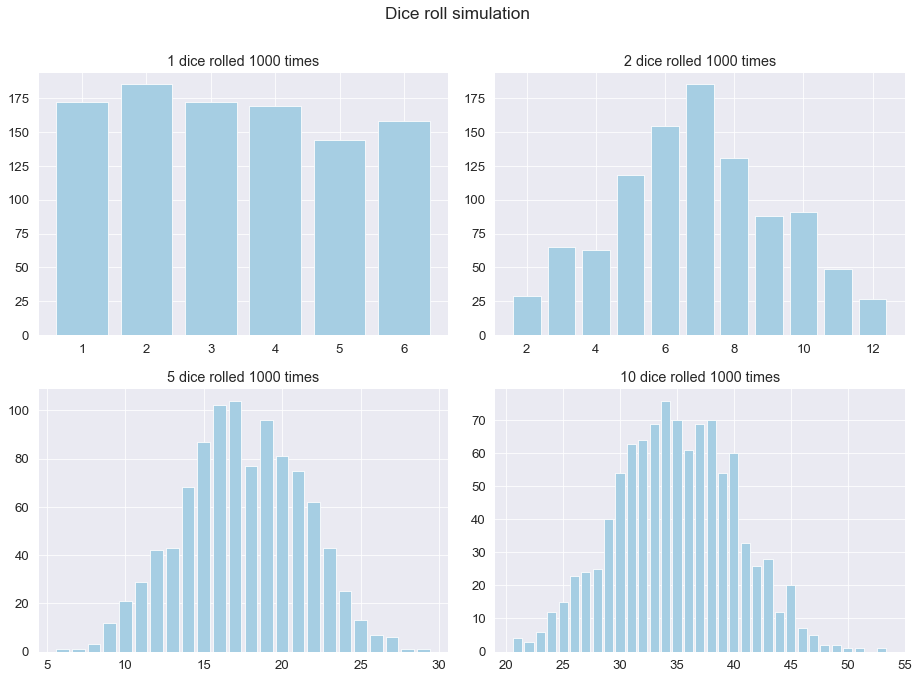

In [7]:
# Build 2x2 plots.
fig, [[ax1, ax2],[ax3, ax4]] = plt.subplots(2,2, sharey=False)
fig.suptitle("Dice roll simulation ", y=1.05)

# Roll 1 Dice.
k1 = 1
n1 = 1000
d = dicerolls(k1, n1)

# Build a plot (by separating keys and values)
ax1.bar(d.keys(), d.values())
ax1.set_title(f"{k1} dice rolled {n1} times")

#  2 Dice.
k2 = 2
n2 = 1000
d = dicerolls(k2, n2)
# Build a plot.
ax2.bar(d.keys(), d.values())
ax2.set_title(f"{k2} dice rolled {n2} times")

# 5 Dice.
k3 = 5
n3 = 1000
d = dicerolls(k3, n3)
# Build a plot.
ax3.bar(d.keys(), d.values())
ax3.set_title(f"{k3} dice rolled {n3} times")

# 10 Dice.
k4 = 10
n4 = 1000
d = dicerolls(k4, n4)
# Build a plot.
ax4.bar(d.keys(), d.values())
ax4.set_title(f"{k4} dice rolled {n4} times")

# Clean up whitespace padding.
fig.tight_layout()

# Display plot.
plt.show()

***
#### Conclusion on the above plots

It can be seen that the graphs approach a normal distribution as the number of dice rolled is increased.

<br>

***
### __TASK 3__: *Flip a coin simulation*  <a name="task3"></a>

<br>

<img align="left" width="200" src="https://www.flaticon.com/svg/static/icons/svg/1715/1715539.svg">

<br>

For simulation of a flipping a coin 100 times with a 50/50 chance of heads or tails I will be using a function [numpy.random.binomial](https://numpy.org/doc/stable/reference/random/generated/numpy.random.binomial.html) from [NumPy](https://numpy.org/) library. This function draws samples from a binomial distribution that has two possible outcomes: "success" or "failure", or in this case "heads" or "tails". [1]

The function takes three parameters:
* _n_ - a number of times coin is flipped,
* _p_ - probability of getting heads or tails,
* _size_ - a number of times we run the test. 

> 1. [Statistics How To: Binomial Distribution](https://www.statisticshowto.com/probability-and-statistics/binomial-theorem/binomial-distribution-formula/)

#### General setup

In [8]:
# Numpy to use numpy.random.binomial function
import numpy as np

<br>

#### Flipping a coin simulation. 

In [9]:
# Flip a coin 100 times with a probability 0.5 of each trial tested 1000 times. 
n, p, size = 100, 0.5, 1000

# Draw the samples.
x = np.random.binomial(n, p, size)

# Display the number of heads.
x

array([45, 60, 45, 51, 58, 56, 54, 42, 47, 50, 43, 61, 53, 58, 47, 50, 50,
       42, 53, 48, 59, 50, 48, 49, 51, 52, 49, 50, 51, 50, 33, 48, 49, 53,
       44, 48, 53, 50, 50, 44, 59, 36, 56, 53, 48, 44, 53, 54, 49, 49, 58,
       44, 59, 46, 43, 46, 60, 53, 50, 46, 47, 46, 58, 59, 56, 48, 53, 51,
       54, 52, 56, 57, 55, 60, 53, 50, 48, 52, 47, 47, 65, 39, 50, 48, 52,
       56, 57, 51, 52, 49, 40, 57, 51, 49, 49, 45, 50, 49, 48, 48, 53, 67,
       52, 55, 44, 49, 60, 58, 49, 50, 37, 52, 53, 47, 52, 54, 50, 45, 48,
       49, 51, 56, 47, 57, 46, 49, 63, 53, 50, 48, 48, 43, 57, 47, 62, 57,
       42, 53, 48, 54, 44, 55, 45, 54, 52, 55, 50, 62, 49, 52, 51, 56, 47,
       60, 43, 56, 52, 47, 42, 65, 57, 48, 53, 56, 46, 51, 50, 49, 47, 53,
       56, 55, 44, 48, 48, 49, 48, 51, 47, 45, 56, 54, 52, 48, 43, 47, 49,
       61, 49, 43, 45, 46, 42, 45, 53, 53, 51, 54, 61, 51, 42, 54, 50, 52,
       51, 46, 48, 51, 49, 45, 53, 46, 47, 52, 54, 46, 43, 56, 54, 46, 56,
       53, 48, 43, 58, 48

<br>

#### Plot the output of flipping a coin 100 times.

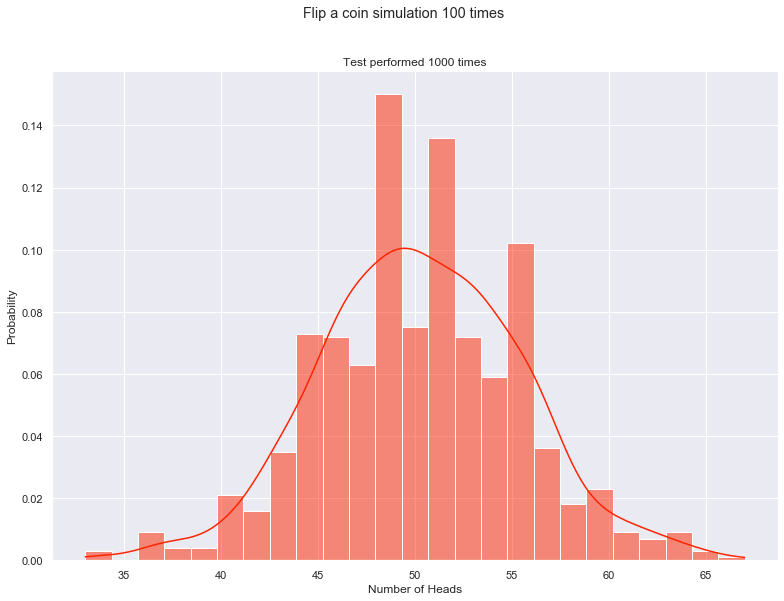

In [10]:
# Colour scheme for the plot.
sns.set_theme(palette="autumn")

# Plot the array.
fig, ax = plt.subplots()
fig.suptitle("Flip a coin simulation 100 times")

sns.histplot(x, stat="probability", kde=True, ax=ax).set_title("Test performed 1000 times")
ax.set_xlabel("Number of Heads")

# Show the plot.
plt.show()

***
#### Conclusion on the above plot

The plot of flip a coin simulator roughly follows a bell-shaped curve.

<br>

***
### __TASK 4__: *Simpson’s paradox*  <a name="task4"></a>

<br>

<img align="left" width="300" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT_UqgTLM_0HWkxxSuAAGnlwkGLV_jth9I6Mg&usqp=CAU">

<br>

__Simpson's paradox__ (or _Yule-Simpson effect_ ), in statistics, is a phenomenon where one particular trend shown in groups of data is reversed when the groups are combined together. In order to interpret data correctly understanding and identifying this paradox is of critical importance.

To demostrate the work of Simpson's paradox I will be using [NumPy](https://numpy.org/) library to create four data sets, each with an __x__ array and a corresponding __y__ array using notation __y = a * x + b__ (which expresses a slraight line)

However, there are other ways we can find Simpson’s Pairs using models, e.g.:

By building decision trees and comparing the distributions, or
By building regression models and comparing the signs of the coefficients


> 1. [BRILLIANT: Simpson's Paradox](https://brilliant.org/wiki/simpsons-paradox/)

In [11]:
import pandas as pd

In [12]:
#Create my own data sets.
x1 = np.linspace(0, 5, 50)
y1 = 3 * x1 + 1
vals1 = np.vstack([x1, y1]).T
set1 = pd.DataFrame(data=vals1, columns=["x", "y"])
set1

,x,y
0,0.000000,1.000000
1,0.102041,1.306122
2,0.204082,1.612245
3,0.306122,1.918367
4,0.408163,2.224490
5,0.510204,2.530612
6,0.612245,2.836735
7,0.714286,3.142857
8,0.816327,3.448980
9,0.918367,3.755102


In [14]:
x2 = np.linspace(10, 10, 50)
y2 = 2 * x2 + 5
vals2 = np.vstack([x2, y2]).T
set2 = pd.DataFrame(data=vals1, columns=["x", "y"])

x3 = np.linspace(3, 6, 50)
y3 = 1 * x3 + 10
vals3 = np.vstack([x2, y2]).T
set3 = pd.DataFrame(data=vals3, columns=["x", "y"])

x4 = np.linspace(0, 4, 50)
y4 = 1 * x4 - 1
vals4 = np.vstack([x4, y4]).T
set4 = pd.DataFrame(data=vals4, columns=["x", "y"])

In [18]:
combined = pd.concat([set1, set2, set3, set4])
combined

,x,y
0,0.000000,1.000000
1,0.102041,1.306122
2,0.204082,1.612245
3,0.306122,1.918367
4,0.408163,2.224490
...,...,...
45,3.673469,2.673469
46,3.755102,2.755102
47,3.836735,2.836735
48,3.918367,2.918367


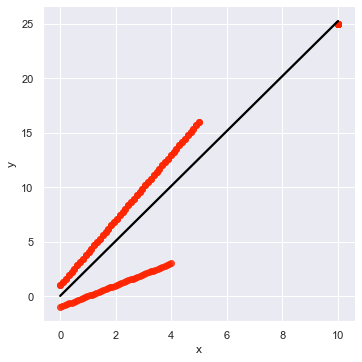

In [19]:
sns.lmplot(data=combined, x="x", y="y", ci=None)
# adda whole data regression line
sns.regplot('x','y', data=combined, color='black', scatter=False, ci=None)
plt.show()
# https://fairnessforensics.github.io/detect_simpsons_paradox/html/notebooks/simple_simpsons_paradox_intro.html

https://en.wikipedia.org/wiki/Simpson%27s_paradox#:~:text=Simpson's%20paradox%2C%20which%20also%20goes,when%20these%20groups%20are%20combined.
https://github.com/WillKoehrsen/Data-Analysis/blob/master/statistics/Simpson's%20Paradox.ipynb